# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
train_file=pd.read_csv('/Users/hemilshah/Downloads/mnistdigit/train.csv')

In [3]:
def convert_format(path):
  import cv2
  import numpy as np
  from matplotlib import pyplot as plt
  from skimage.transform import resize
  #Import image
  image = cv2.imread(path,1)
  #rgb_weights = [0.2989, 0.5870, 0.1140]
  #k=np.dot(image[...,:3], rgb_weights)
  image=image/255.0
  #resized = resize(image, (28,28))
  return image

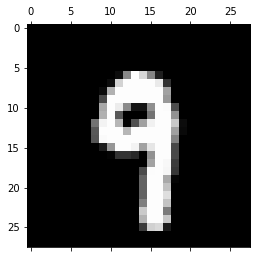

In [4]:
plt.matshow(convert_format('/Users/hemilshah/Downloads/mnistdigit/Images/train/1.png'))
#convert_format('/Users/hemilshah/Downloads/train_dir/train/1.png').shape

In [5]:
len(train_file)

49000

In [7]:
listing=[]
for i in range(0,49000):
    listing.append(convert_format('/Users/hemilshah/Downloads/mnistdigit/Images/train/'+str(i)+'.png'))

In [8]:
X=np.array(listing)
X=X.reshape((-1,28,28,3))
y=train_file['label'].values

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=13)

In [10]:
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

# Data Augmentation

In [11]:
datagen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
training_generator = datagen.flow(X_train, y_train, batch_size=256)
validation_generator=datagen.flow(X_test, y_test, batch_size=256)
#training_generator=datagen.flow(X_train,y,batch_size=64)

In [13]:
X_test.shape

(4900, 28, 28, 3)

# CNN Model Building

In [14]:
#create convolutional base
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=X_train.shape[1:]))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25))


model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer=optimizer)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        1

In [15]:
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
history=model.fit_generator(training_generator,
                            steps_per_epoch=44100//256,
                            epochs=30,
                            validation_steps=4900//256,
                            validation_data=validation_generator,
                            callbacks=[early_stop])

W0606 15:11:26.616999 4643143104 deprecation.py:323] From <ipython-input-15-6b9000eb5278>:7: Model.fit_generator (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
Please use Model.fit, which supports generators.
W0606 15:11:26.738091 4643143104 data_adapter.py:1091] sample_weight modes were coerced from
  ...
    to  
  ['...']
W0606 15:11:26.850327 4643143104 data_adapter.py:1091] sample_weight modes were coerced from
  ...
    to  
  ['...']


Train for 172 steps, validate for 19 steps
Epoch 1/30
172/172 [==============================] - 102s 593ms/step - loss: 0.6217 - accuracy: 0.8104 - val_loss: 13.4308 - val_accuracy: 0.1110
Epoch 2/30
172/172 [==============================] - 116s 677ms/step - loss: 0.1771 - accuracy: 0.9463 - val_loss: 6.6331 - val_accuracy: 0.1419
Epoch 3/30
172/172 [==============================] - 112s 652ms/step - loss: 0.1236 - accuracy: 0.9636 - val_loss: 0.8323 - val_accuracy: 0.7967
Epoch 4/30
172/172 [==============================] - 100s 580ms/step - loss: 0.0962 - accuracy: 0.9709 - val_loss: 0.1327 - val_accuracy: 0.9636
Epoch 5/30
172/172 [==============================] - 120s 697ms/step - loss: 0.0852 - accuracy: 0.9744 - val_loss: 0.0463 - val_accuracy: 0.9860
Epoch 6/30
172/172 [==============================] - 107s 625ms/step - loss: 0.0735 - accuracy: 0.9775 - val_loss: 0.0525 - val_accuracy: 0.9854
Epoch 7/30
172/172 [==============================] - 110s 638ms/step - loss: 0.

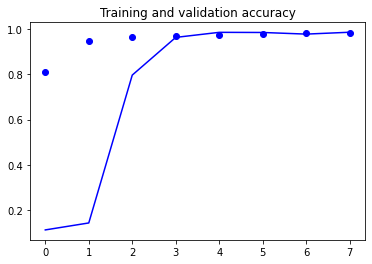

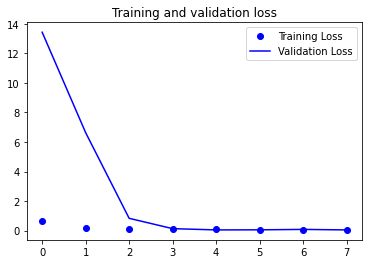

In [16]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
model.evaluate(X_test,y_test)

4900/4900 [==============================] - 2s 462us/sample - loss: 0.0339 - accuracy: 0.9900


[0.03392564565565779, 0.99]

In [20]:
test_file=pd.read_csv('/Users/hemilshah/Downloads/mnistdigit/sample_submission.csv')
k=test_file['filename'].values
test_listing=[]
for i in k:
    test_listing.append(convert_format('/Users/hemilshah/Downloads/mnistdigit/Images/test/'+str(i)))
test=np.array(test_listing)
test=test.reshape((-1,28,28,3))

In [21]:
predictions=model.predict(test)
predicted=[np.argmax(i) for i in predictions]
submission=pd.DataFrame()
submission['filename']=test_file['filename'].values
submission['label']=predicted
submission.to_csv('mnist_03.csv',index=False)